<a href="https://colab.research.google.com/github/momchilgeorgiev/2023DL/blob/main/Intro_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Deep Learning
***

In [2]:
# Main libraries:

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris

### 1. Tf setup:

In [3]:
!nvidia-smi

Tue Jan  9 14:47:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
gpu = tf.config.list_physical_devices("GPU")[0]

In [5]:
tf.config.experimental.set_memory_growth(gpu, True) # Uses minimal memory. If more is needed it takes more!

### 2. Computing graphs with tf

Since tensor flow uses graphs to represent objects, we need to define our variables:

In [6]:
a = tf.constant(2)
b = tf.constant(3)

To compute (2 * a + 3 * b)^2 we can try writing a function since everything is a graph:

In [7]:
def compute(a, b):
  return tf.pow(
      tf.add(
          tf.multiply(2, a),
          tf.multiply(3, b)
      ), 2
  )

In [8]:
compute(a, b)

<tf.Tensor: shape=(), dtype=int32, numpy=169>

Alternatively we can use numpy/standard operations:


In [9]:
def compute_normal(a, b):
  return (2 * a + 3 * b) ** 2

In [10]:
compute_normal(a, b)

<tf.Tensor: shape=(), dtype=int32, numpy=169>

### 3. Linear models



Load data:

In [11]:
from sklearn.datasets import load_iris

In [12]:
iris = load_iris()
attributes, labels = iris.data, iris.target

One hot encode the labels and get the number of classes for the next step which is setting up the NN:

In [13]:
number_of_classes = np.unique(iris.target).shape[0]
labels_ohe = tf.one_hot(labels, depth = number_of_classes)

We want to create a linear regression for our 3 classes. For that we'll need one dense layer for every class. We use softmax as an acivation function:

> Check types of layers (dense, input, output and so-on)

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape = (4,)),
    tf.keras.layers.Dense(3, activation = "softmax")

])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
tf.keras.backend.clear_session() # TensorFlow models remember the last fit so when we call .fit again it starts from where it has left before. To avoid that we call this code
model.fit(attributes, labels_ohe, epochs = 100)

In [18]:
predictions = model.predict(attributes)

acc = tf.metrics.categorical_accuracy(labels_ohe, predictions)
print(tf.math.reduce_mean(acc).numpy())


5/5 [==============================] - 0s 2ms/step
0.91333336


### 4. Feed-forward NNs

In [19]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test =x_train / 250.0, x_test / 250.0

11490434/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, '6')

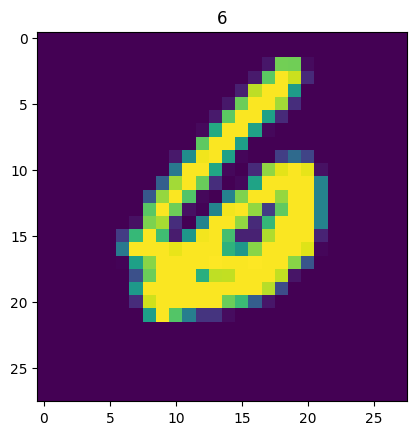

In [20]:
img = 565
plt.imshow(x_train[img])
plt.title(y_train[img])

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')

])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


In [22]:
model.fit(x_train, y_train, epochs = 5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2197 - accuracy: 0.9354
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0978 - accuracy: 0.9702
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0699 - accuracy: 0.9783
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0549 - accuracy: 0.9824
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0638 - accuracy: 0.9807


[0.0637650340795517, 0.9807000160217285]

## DIY

In [112]:
tf.keras.backend.clear_session()

In [42]:
attributes, labels = load_iris().data, load_iris().target
data, target  = load_iris(as_frame = True, return_X_y = True)

In [ ]:
# Combine attributes and labels into a single DataFrame
df = pd.concat([data, target], axis=1)
# Rename the target column to 'target'
df.rename(columns={'target': 'label'}, inplace=True)

df

In [47]:
column_size = attributes.shape[1]
classes_num = len(set(labels))
labels_ohe = tf.one_hot(labels, depth = classes_num)
column_size, classes_num

(4, 3)

In [108]:
model = tf.keras.models.Sequential([
    Input(shape = (column_size,)),
    Dense(column_size, activation = "softmax"),
    Dense(classes_num, activation = "softmax")
])

In [109]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 3)                 15        
                                                                 
Total params: 35 (140.00 Byte)
Trainable params: 35 (140.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The summary tells us:

* That we have 1 hidden layer
* There are 3 possible outputs, it doesn't matter how many samples.
* Alltogether: 15 nodes



  

In [59]:
%reload_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Define the TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# opt = tf.keras.optimizers.SGD(learning_rate=0.1)

# Compile your model
model.compile(optimizer = 'sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model with the TensorBoard callback
model.fit(attributes, labels_ohe, epochs=100, callbacks=[tensorboard_callback])


In [ ]:
%tensorboard --logdir logs

In [69]:
model.evaluate(attributes, labels_ohe)

5/5 [==============================] - 0s 5ms/step - loss: 1.0991 - accuracy: 0.3333


[1.0991061925888062, 0.3333333432674408]